Import some prerequisites

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import random
import math

Run this cell for plotting

In [13]:
def plotter(img_list, r, w, gray, wr, hr, fig_name = None):
    '''
    Plots images' list with its' caption and saves result image if you want.

    Parameters:
        img_list (list): The list of tuples of image and its' caption.
        r (int): The number of row(s).
        w (int): The number of colunm(s).
        gray (bool): The flag for plotting images in grayscale mode.
        wr (int): The width of one figure.
        hr (int): The height of one figure.
        fig_name (str): The name of the image of the plot. if not set this parameter the plot doesn't save.
    '''
    
    plt.rcParams['figure.figsize'] = (wr, hr)
    for i in range(len(img_list)):
        plt.subplot(r, w, i + 1)
        if img_list[i][2] == 'img':
            if gray:
                plt.imshow(img_list[i][0], cmap = 'gray')
            else:
                plt.imshow(img_list[i][0])
            plt.xticks([])
            plt.yticks([])
        elif img_list[i][2] == 'hist':
            plt.bar(np.arange(len(img_list[i][0])), img_list[i][0], color = 'c')
        else:
            raise Exception("Only image or histogram. Use third parameter of tuples in img_list and set it to img or hist.")
        plt.title(img_list[i][1])
    if fig_name is not None:
        plt.savefig(fig_name + '.png')
    plt.show()

Run this cell for change polar to cartesian.

In [14]:
def pol_to_car(rho, theta):
    '''
    Changes rho and theta of a line to two point of that line.
    
    Parameters:
        rho (float): The distance from the origin to the line.
        theta (float):  Angle from origin to the line.
    
    Returns:
        (tuple): tuple of two point of line.
    '''
    
    a = np.cos(theta)
    b = np.sin(theta)
    c = 1000
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + c * (-b))
    y1 = int(y0 + c * (a))
    x2 = int(x0 - c * (-b))
    y2 = int(y0 - c * (a))
    return x1, y1, x2, y2

# part b


Implement this function to detect and remove circles in the given image.

cv2.HoughCircles </br>
cv2.circle

In [15]:
def remove_circles(image):
    '''
    Returns the image with circles removed.

    Parameters:
        image (numpy.ndarray): The input image.

    Returns:
        out_img (numpy.ndarray): The resulting image with circles removed.
    '''

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise
    # blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Perform Hough circle detection
    circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, dp=1, minDist=50,
                               param1=50, param2=25, minRadius=1, maxRadius=80)

    # Check if circles are detected
    if circles is not None:
        # Convert the circle parameters to integers
        circles = np.round(circles[0, :]).astype(int)

        # Create a mask to remove circles
        mask = np.ones(image.shape[:2], dtype=bool)

        # Iterate through the detected circles and update the mask
        for (x, y, radius) in circles:
            # Generate circle coordinates
            circle_y, circle_x = np.ogrid[:image.shape[0], :image.shape[1]]
            circle_mask = (circle_x - x) ** 2 + (circle_y - y) ** 2 <= radius ** 2 + 100

            # Update the mask to exclude the circle
            mask &= ~circle_mask

        # Apply the mask to remove circles from the image
        out_img = image.copy()
        out_img[~mask] = [0, 0, 0]  # Set removed pixels to black
    else:
        # No circles detected, return the original image
        out_img = image.copy()

    return out_img

Test your implementation (dont change this cell)

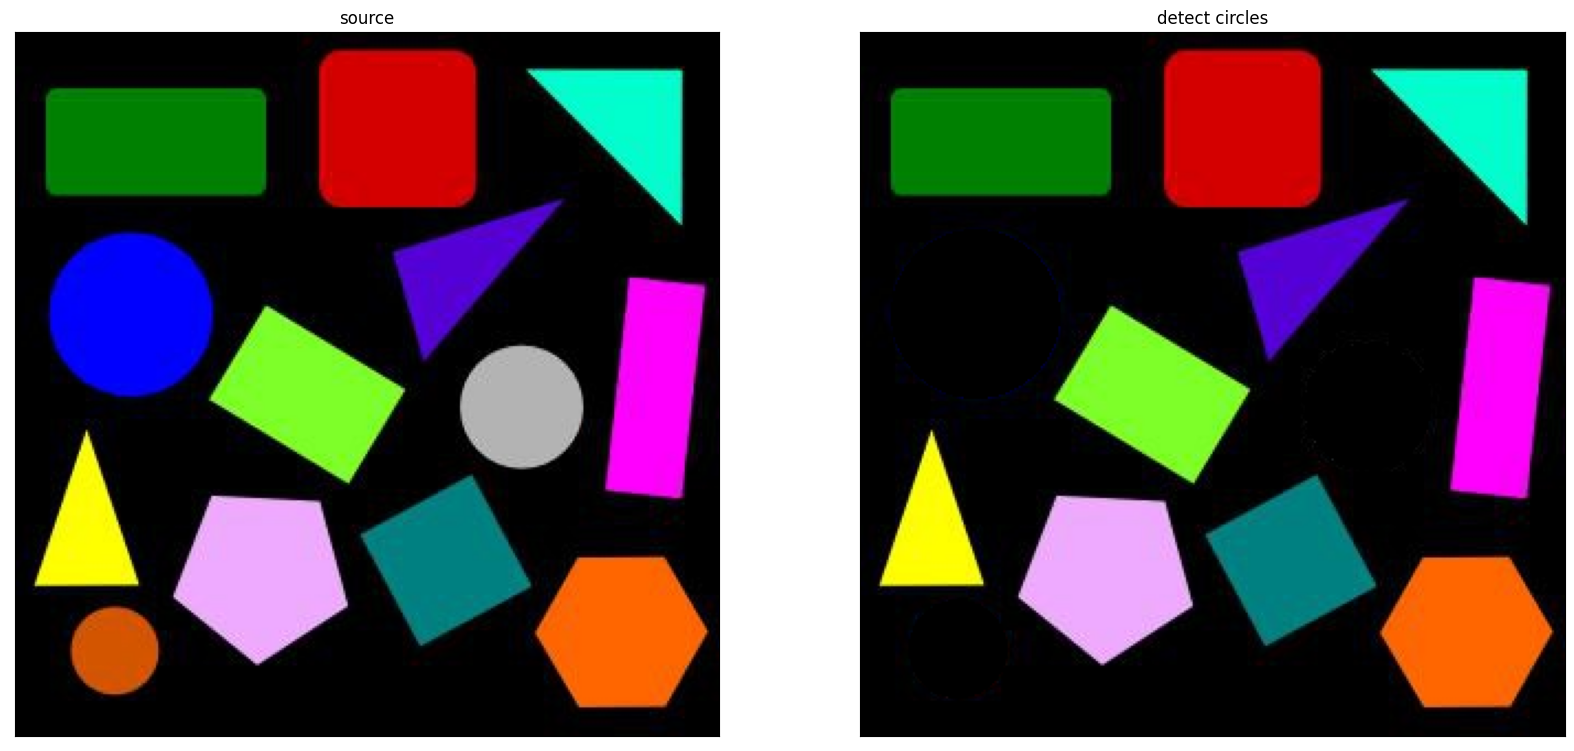

In [16]:
image_list = []

image = cv2.imread(os.path.join('./', '1.jpg'))
image_list.append([cv2.cvtColor(image, cv2.COLOR_BGR2RGB), 'source', 'img'])

out_img = remove_circles(image)

image_list.append([cv2.cvtColor(out_img, cv2.COLOR_BGR2RGB), 'detect circles', 'img'])

plotter(image_list, 1, 2, True, 20, 10, 'q4a')

# part c

Implement this function to detect lines in the given image with hough algorithm.

In [17]:
def detect_lines_hough(image):
    '''
    Returns the image with lines detected.

    Parameters:
        image (numpy.ndarray): The input image.

    Returns:
        out_img (numpy.ndarray): The resulting image with lines detected.
    '''

    removed_circles = remove_circles(image)
    
    # Convert the image to grayscale
    gray = cv2.cvtColor(removed_circles, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (7, 7), 0)
    
    # Applying Canny
    edges = cv2.Canny(gray, 100, 200, apertureSize=5)

    # Applying Hough
    lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=2, minLineLength=10, maxLineGap=5)

    img = np.zeros_like(edges)

    i = 0
    for line in lines:
      i+=1
      x1, y1, x2, y2 = line[0]
      cv2.line(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
  
    return img

Test your implementation (dont change this cell)

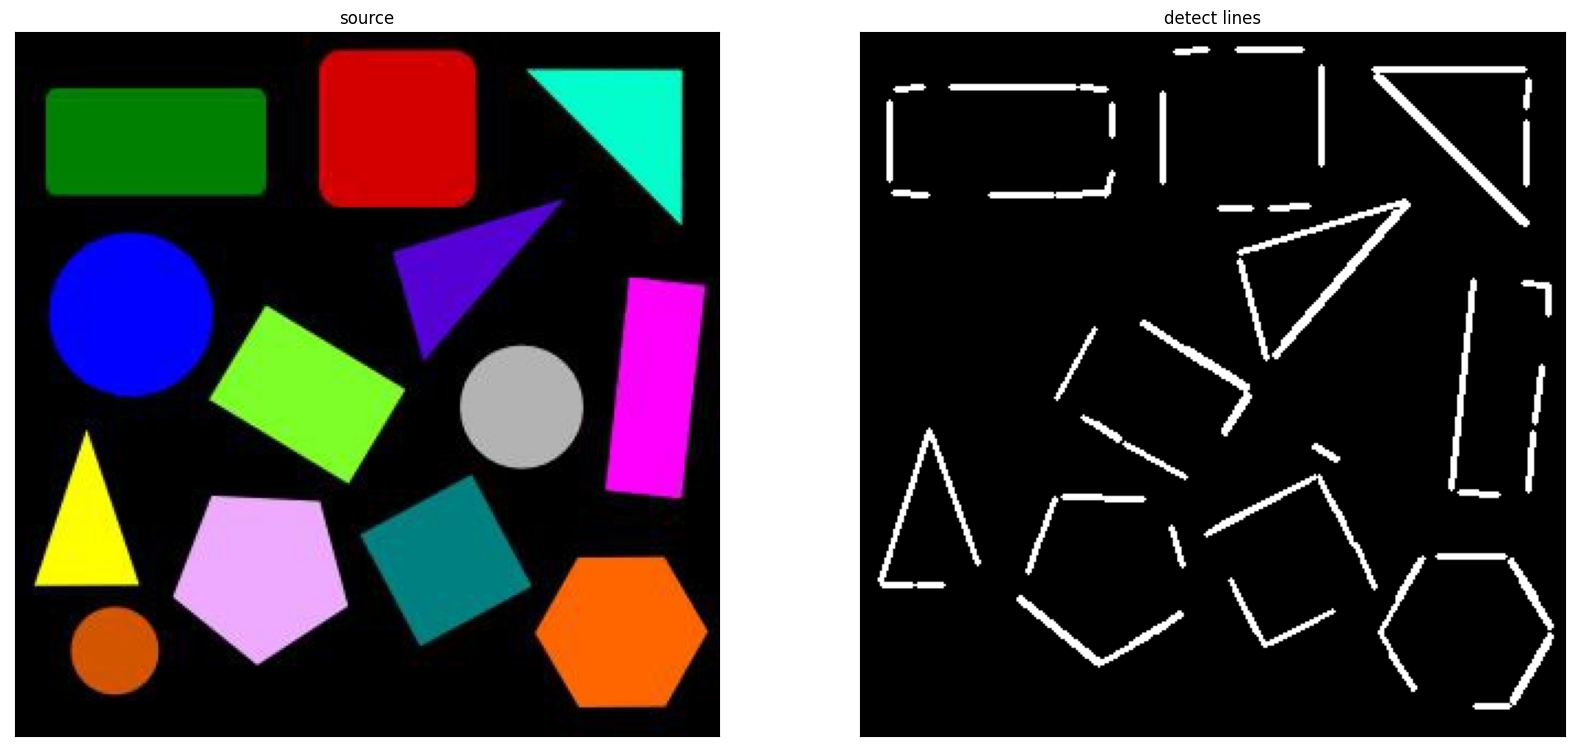

In [19]:
image_list = []

image = cv2.imread(os.path.join('./', '1.jpg'))
image_list.append([cv2.cvtColor(image, cv2.COLOR_BGR2RGB), 'source', 'img'])

out_img = detect_lines_hough(image)

image_list.append([cv2.cvtColor(out_img, cv2.COLOR_BGR2RGB), 'detect lines', 'img'])

plotter(image_list, 1, 2, True, 20, 10, 'q4b')

In [20]:
def detect_lines_hough2(image):
    '''
    Returns the image with lines detected.

    Parameters:
        image (numpy.ndarray): The input image.

    Returns:
        out_img (numpy.ndarray): The resulting image with lines detected.
    '''

    # Convert the image to grayscale
    gray = cv2.cvtColor(remove_circles(image), cv2.COLOR_BGR2GRAY)
    out_img = np.copy(gray)
    gray = cv2.GaussianBlur(gray, (3, 3), 0)
    
    edges = cv2.Canny(gray, 50, 150, apertureSize=3)

    lines = cv2.HoughLines(edges, 1, np.pi/180, threshold=80)

    if lines is not None:
        for line in lines:
            rho, theta = line[0]
            x1, y1, x2, y2 = pol_to_car(rho, theta)
            cv2.line(out_img, (x1, y1), (x2, y2), (255, 255, 255), 2)


    return out_img

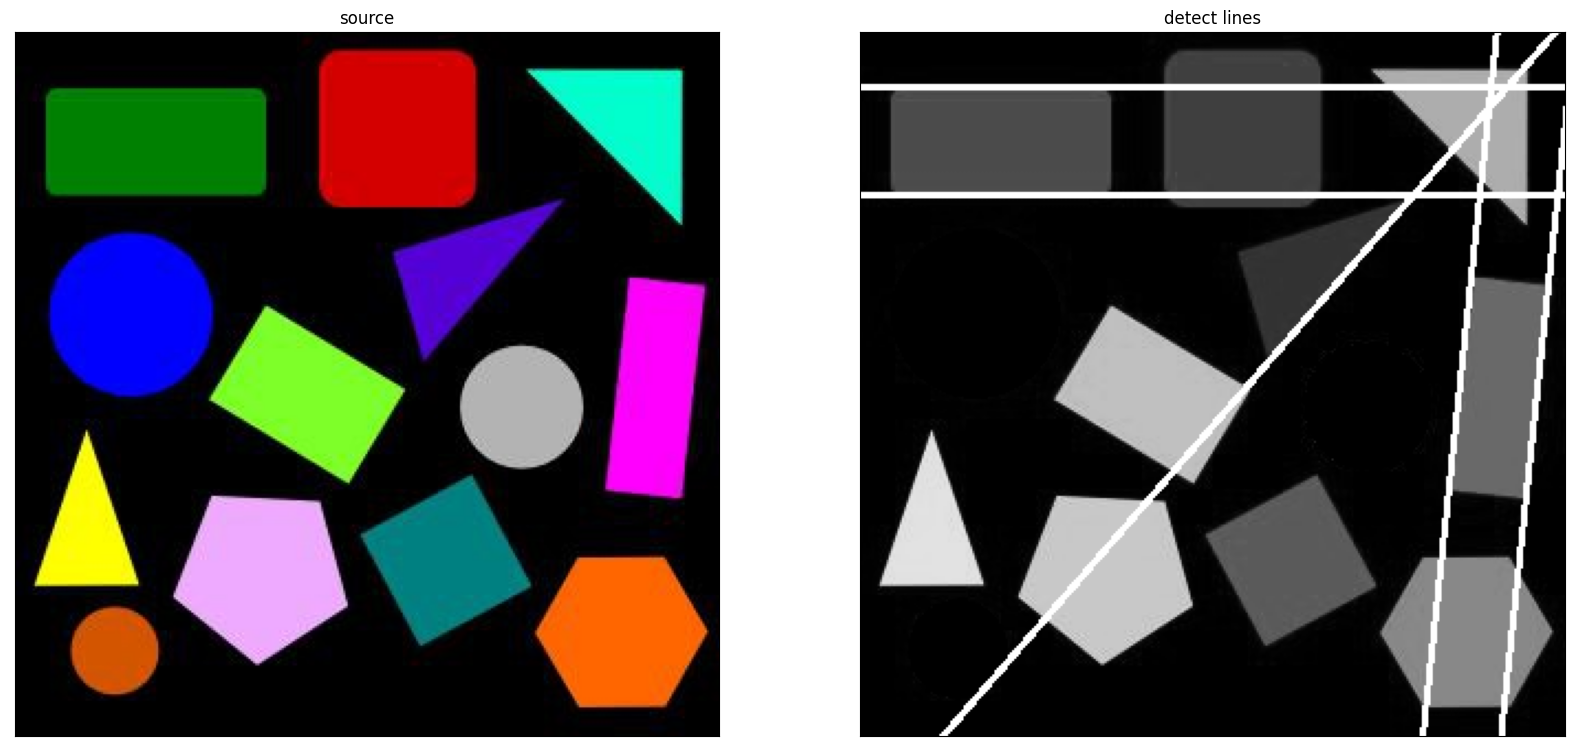

In [21]:
image_list = []

image = cv2.imread(os.path.join('./', '1.jpg'))
image_list.append([cv2.cvtColor(image, cv2.COLOR_BGR2RGB), 'source', 'img'])

out_img = detect_lines_hough2(image)

image_list.append([cv2.cvtColor(out_img, cv2.COLOR_BGR2RGB), 'detect lines', 'img'])

plotter(image_list, 1, 2, True, 20, 10, 'q4b')

# part d